In [1]:
import torch
from torch import nn 
import matplotlib.pyplot as plt

torch.__version__

'1.13.1+cu117'

In [2]:
#Data preparing and loading
#Data can be almost anything ...... in machine learning

#1.Excel Spreadsheet
#2.Images of any kind
#3.Videos (youtube as a lot of data)
#4.Audios like songs and podcasts
#5.DNA 
#6.Text

#Machine learning is a game of two parts:
#1.Get data into a numerical representaion
#2.Build a model to learn patterns in that numerical representations

In [3]:
#create a known parameter
weight=0.7
bias=0.3
start=0
end=1
step=0.02

X=torch.arange(start,end,step).unsqueeze(dim=1)
Y=weight * X + bias

X[:10],Y[:10],len(X),len(Y)


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [4]:
#Splitting data into training and test sets
train_split=int(0.8*len(X))
X_train,Y_train=X[:train_split],Y[:train_split]
X_test,Y_test=X[train_split:],Y[train_split:]
len(X_train),len(Y_train),len(X_test),len(Y_test)

(40, 40, 10, 10)

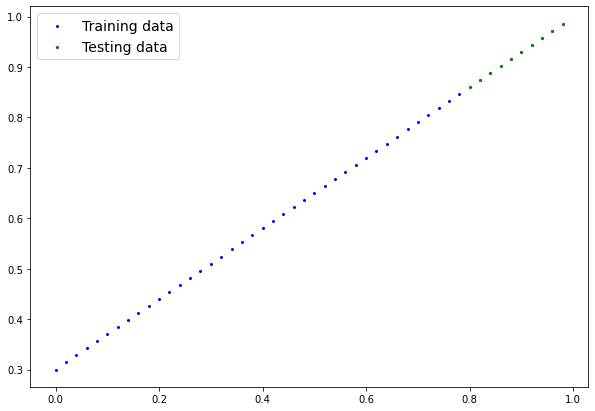

In [5]:
#Visualization
def plot_prediction(train_data=X_train,
                    train_labels=Y_train,
                    test_data=X_test,
                    test_labels=Y_test,
                    predictions=None):
    plt.figure(figsize=(10,7))

    #Plot training data in blue
    plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")

    #plot testing data in green
    plt.scatter(test_data,test_labels,c="g",s=5,label="Testing data")

    #are there predictions?
    if predictions is not None:
        plt.scatter(test_data,predictions, c="r",s=5,label="predictions")
    
    plt.legend(prop={"size":14})

plot_prediction()


    
    
        

In [6]:
#Building the Model
from torch import nn

class LinerRegression(nn.Module): #allmost everything in pytorch inherites form nn.Module
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.randn(1,
                                  requires_grad=True,
                                  dtype=torch.float))

        self.bias=nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))

        #Forward method to define the computation in the model
    def forward(self,x: torch.Tensor)->torch.Tensor:
        return self.weights * x + self.bias

    

In [7]:
#create a random seed
torch.manual_seed(42)

model_0=LinerRegression()
model_0
list(model_0.parameters())
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [8]:
Y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [9]:
#Making predictions using torch.inference_mode()
#to check our model's predictive power,let's see how well it predicts y_test based on x_test
#when we pass data through our model,it's going to run it through the forward() method.

#make predictions with model
with torch.inference_mode():
    y_preds=model_0(X_test)
#or you can same as with torch.no_grad(), however, inference mode is preferred 
with torch.no_grad():
    y_preds=model_0(X_test)
y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

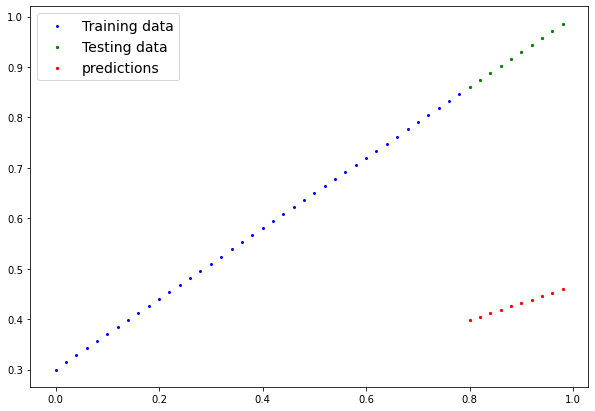

In [10]:
plot_prediction(predictions=y_preds)

In [11]:
#Model training
#The whole idea of training is for a model to move form some *Unknown* parameters(these may be random) to some known parameters

#or in other words from poor representation of the data to better representation of the data

# one way to measure how poor or how wrong your models predictions are is to use loss functions 

#Note: Loss function may also be called cost function or criterion in different areas. For our case,we're  going to refer to it as loss function.

#Loss Function: A Function to measure how wrong  your model's predictions are to the ideal outputs, lower is better.

#Optimizer: Takes into account the loss of the model and adjusts the model's parameters(e.g:weight and bias in our case) to improve the loss function.

#And specifically for Pytorch, we need:
#Training loop
#Testing loop

In [12]:
#Setup Loss function 
loss_fn=nn.L1Loss()
loss_fn

L1Loss()

In [13]:
optimizer=torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)
                            #learning rate
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [14]:
#Building the training loop and testing loop in pytorch

#A couple of things we need in training loop:

#0.Loop through the data
#1.Forward pass(this involves data moving through our models forward()  functions) to make predictions on data also called forward propagation
#3.Calculate the loss(compare forward pass predictions to ground truth labels)
#4.Loss Backward-move backwards through the network to calculate the gradients of each of the parameters of our model with respect to loss(backpropgation)
#5.Optimizer step-use the optimizer to adjust our model's parameters to try and improve the loss(gradient descent)


In [15]:
torch.manual_seed(42)
#An epoch is loop through the data.....(this is hyperparameter because we've set)
epochs=200
epoch_count=[]
training_loss=[]
testing_loss=[]

#Training 
#0. Loop through the data
for epoch in range(epochs):
    #set the model to traing mode
    model_0.train() #train mode in pytorch sets all parameters that requires gradients to require gradients

    #1.Forward pass
    y_pred = model_0(X_train)

    #2.Calculate the loss 
    loss = loss_fn(y_pred,Y_train)
    #print(f'Loss:{loss}')

    #3.Optimizer zero grad
    optimizer.zero_grad()

    #4.Perform backpropgation on this loss with respect to the parameters of the model
    loss.backward()

    #5.Step the optimizer (perform gradient descent)
    optimizer.step()#by default how the optimizer changes will acculumate through the loop so.... we have to zero then above in step3 for the next iteration of the loop 



    #Testing
    model_0.eval() #turns off different settings in the model not needed for evaluation/testing(dropout/batch norm layers)
    with torch.inference_mode(): #turns off gradient tracking and couple more things behind the scenes
        #1. do the Forward pass
        test_pred=model_0(X_test)

        #2. calculate the loss
        test_loss=loss_fn(test_pred,Y_test)

    if epoch % 10==0:
        epoch_count.append(epoch)
        training_loss.append(loss)
        testing_loss.append(test_loss)
        print(f'Epoch:{epoch}| Training loss:{loss}|Test loss:{test_loss}')
        print(model_0.state_dict())


Epoch:0| Training loss:0.31288138031959534|Test loss:0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch:10| Training loss:0.1976713240146637|Test loss:0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch:20| Training loss:0.08908725529909134|Test loss:0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch:30| Training loss:0.053148526698350906|Test loss:0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch:40| Training loss:0.04543796554207802|Test loss:0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch:50| Training loss:0.04167863354086876|Test loss:0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch:60| Training loss:0.03818932920694351|Test loss:0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('

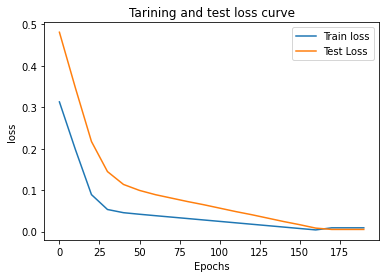

In [16]:
import numpy as np
plt.plot(epoch_count,np.array(torch.Tensor(training_loss).numpy()),label="Train loss")
plt.plot(epoch_count,testing_loss,label="Test Loss")
plt.title("Tarining and test loss curve")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend()

In [17]:
import numpy as np
np.array(torch.Tensor(training_loss).numpy())

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
       0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
       0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
      dtype=float32)

In [18]:
testing_loss

[tensor(0.4811),
 tensor(0.3464),
 tensor(0.2173),
 tensor(0.1446),
 tensor(0.1136),
 tensor(0.0992),
 tensor(0.0889),
 tensor(0.0806),
 tensor(0.0723),
 tensor(0.0647),
 tensor(0.0565),
 tensor(0.0482),
 tensor(0.0406),
 tensor(0.0323),
 tensor(0.0241),
 tensor(0.0165),
 tensor(0.0082),
 tensor(0.0050),
 tensor(0.0050),
 tensor(0.0050)]

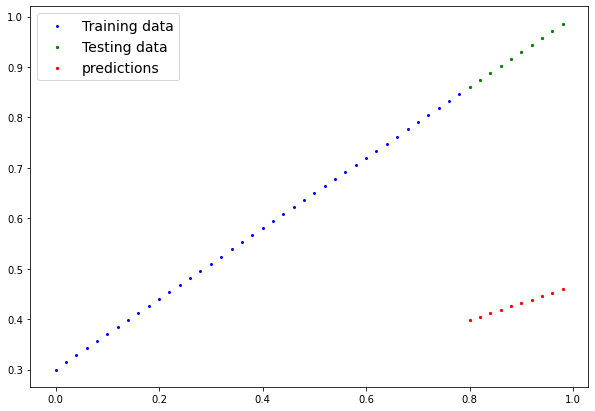

In [19]:
plot_prediction(predictions=y_preds)

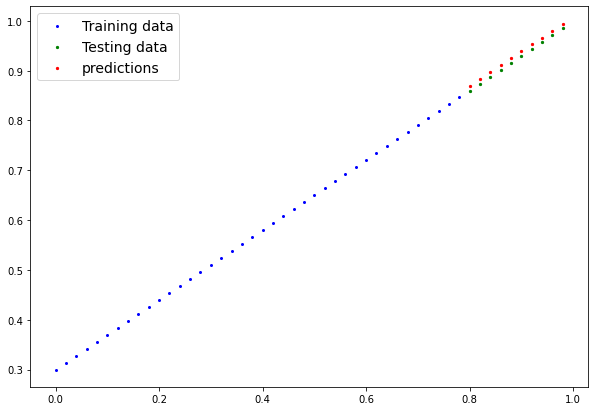

In [22]:
plot_prediction(predictions=test_pred)

In [54]:
#Saving a model in Pytroch
#1.torch.save()-allows u to save a PyTorch object in python's pickel format
#2.torch.load()-allows u load a saved PyTorch Object
#3.torch.nn.Module.load_state_dict()-this allows to load a models's state dictionary 

In [55]:
#saving our pytorch model
from pathlib import Path

#1.Create models directory
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#2.create model save path
MODEL_NAME="01_pytorch_workflow.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

#3.Save the model state dict 
print(f'Saving model to:{MODEL_SAVE_PATH}')

torch.save(obj=model_0.state_dict(),
            f=MODEL_SAVE_PATH)



Saving model to:models/01_pytorch_workflow.pth


In [56]:
#Loading a PyTorch Model
#Since we saved our model's state_dict() rather the entire model, we'll create a new instance of our model class and load the saved state_dict() into that

#to load in a saved state_dict we have to instantiate a new instance of our model class 
loaded_model_0=LinerRegression()

#Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [57]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [58]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [59]:
#Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_pred_y=loaded_model_0(X_test)

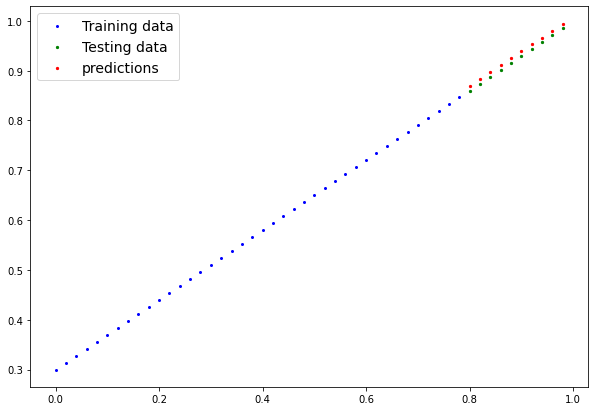

In [60]:
plot_prediction(predictions=loaded_pred_y)

In [61]:
import torch 
from torch import nn 
import matplotlib.pyplot as plt


In [42]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [34]:
#Data
weight=0.7
bias=0.3

start=0
end=1
step=0.02

X=torch.arange(start,end,step).unsqueeze(dim=1)
Y=weight * X + bias

X[:10],Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [35]:
#Split Data
train_split=int(0.8*len(X))
X_tarin,Y_train=X[:train_split],Y[:train_split]
X_test,Y_test=X[train_split:],Y[train_split:]

len(X_tarin),len(Y_train),len(X_test),len(Y_test)

(40, 40, 10, 10)

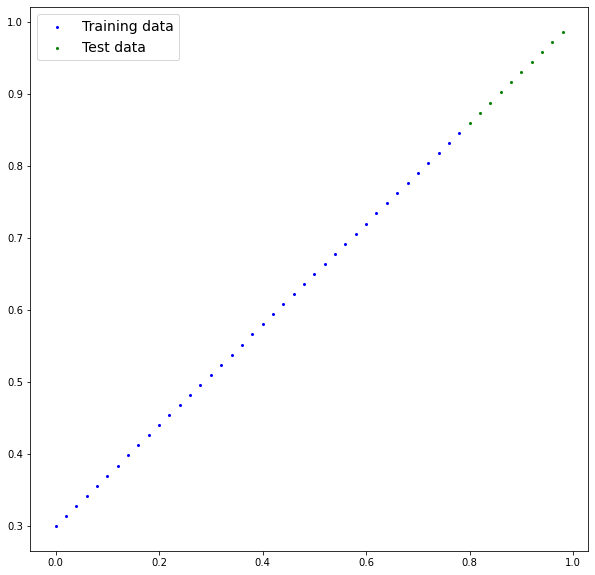

In [36]:
#Viluzation
def plot_prediction1(train_data=X_tarin,
                    train_labels=Y_train,
                    test_data=X_test,
                    test_labels=Y_test,
                    predictions=None):
    plt.figure(figsize=(10,10))

    plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")

    plt.scatter(test_data,test_labels,c="g",s=4,label="Test data")


    if predictions is not None:
        plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")

    plt.legend(prop={"size":14})

plot_prediction1()





In [78]:
#Building a Model
class LinearRegressionmodel(nn.Module):
    def __init__(self):
        super().__init__()

        #Use Linear() for creating the model parameters/ also called linear transform, probing layer,fully connected layer, dense layer
        self.linear_layer=nn.Linear(in_features=1,
                                    out_features=1)
    
    def forward(self,x:torch.Tensor)->torch.Tensor():
        return self.linear_layer(x)


In [79]:
torch.manual_seed(42)
model_1=LinearRegressionmodel()
model_1,model_1.state_dict()

(LinearRegressionmodel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [63]:
next(model_1.parameters()).device

device(type='cpu')

In [64]:
model_1.to(device) #for gpu
next(model_1.parameters()).device

device(type='cpu')

In [80]:
#Training
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [81]:
#training loop
epochs=200
epoch_count=[]
training_loss=[]
testing_loss=[]

for epoch in range(epochs):
    model_1.train()
    y_pred1=model_1(X_train)
    #print(y_pred1)

    loss_train=loss_fn(y_pred1,Y_train)

    optimizer.zero_grad()

    loss_train.backward()

    optimizer.step()



#testing
    model_1.eval()
    with torch.inference_mode():
        test_pred=model_1(X_test)
        test_loss=loss_fn(test_pred,Y_test)



    if epoch%10==0:
        epoch_count.append(epoch)
        training_loss.append(loss_train)
        testing_loss.append(test_loss)

        print(f"Epoch:{epoch} | Training_loss:{loss_train} | Testing loss:{test_loss}")

     

Epoch:0 | Training_loss:0.5551779866218567 | Testing loss:0.5739762187004089
Epoch:10 | Training_loss:0.4399680495262146 | Testing loss:0.4392663538455963
Epoch:20 | Training_loss:0.3247582018375397 | Testing loss:0.30455657839775085
Epoch:30 | Training_loss:0.20954827964305878 | Testing loss:0.16984674334526062
Epoch:40 | Training_loss:0.09433844685554504 | Testing loss:0.03513689711689949
Epoch:50 | Training_loss:0.023886386305093765 | Testing loss:0.04784906655550003
Epoch:60 | Training_loss:0.0199567973613739 | Testing loss:0.04580312222242355
Epoch:70 | Training_loss:0.016517987474799156 | Testing loss:0.0375305712223053
Epoch:80 | Training_loss:0.013089170679450035 | Testing loss:0.029944902285933495
Epoch:90 | Training_loss:0.009653178043663502 | Testing loss:0.02167237363755703
Epoch:100 | Training_loss:0.006215679459273815 | Testing loss:0.014086711220443249
Epoch:110 | Training_loss:0.002787243574857712 | Testing loss:0.005814164876937866
Epoch:120 | Training_loss:0.001264503

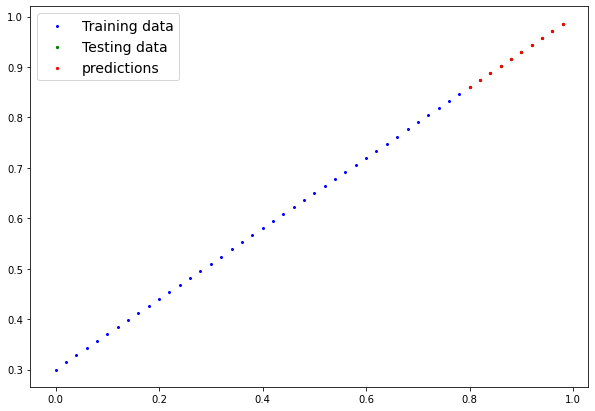

In [82]:
plot_prediction(predictions=test_pred)

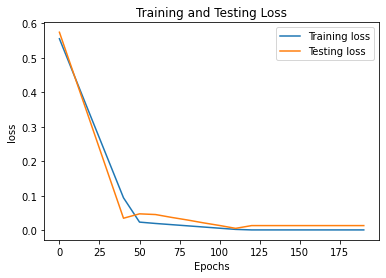

In [83]:
import numpy as np
plt.plot(epoch_count,np.array(torch.Tensor(training_loss).numpy()),label="Training loss")
plt.plot(epoch_count,testing_loss,label="Testing loss")
plt.title("Training and Testing Loss")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend()

In [84]:
#saving the Model
from pathlib import Path
MODEL_PATH=Path("giri")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME="work_flow_train02.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

print(f'Saving Model:{MODEL_SAVE_PATH}')
torch.save(obj=model_1.state_dict(),
            f=MODEL_SAVE_PATH)

Saving Model:giri/work_flow_train02.pth


In [85]:
#Loading the Model

loaded_model_1=LinearRegressionmodel()
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [86]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [87]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [88]:
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_pred1=loaded_model_1(X_test)

loaded_model_pred1

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

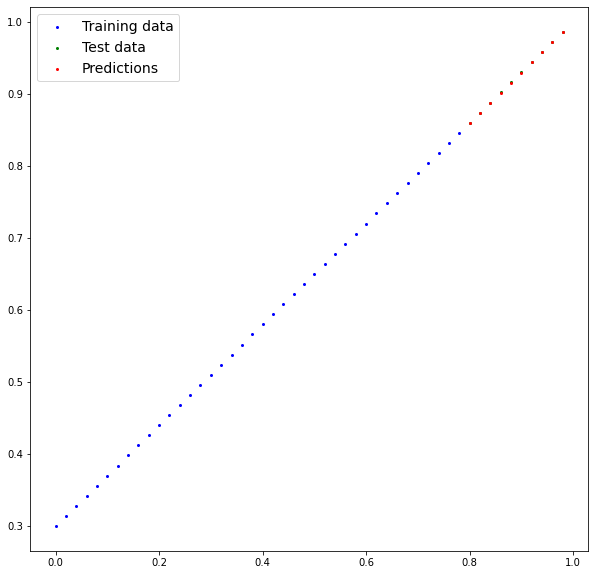

In [89]:
plot_prediction1(predictions=loaded_model_pred1)

In [90]:
loaded_model_pred1==test_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])